In [53]:
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import sys
sys.path
from scipy import stats
sys.path.append('../simulation')
import TS_personal_params_pooled as pp
import TS_global_params_pooled as gtp

In [2]:
def group_by_time_stamp(case_dict):
    to_return={}
    
    for sim,data in case_dict.items():
        
        for date,results in data.items():
            if date not in to_return:
                to_return[date]={}
            to_return[date][sim]=results
    return to_return

In [36]:
def get_all():
    #to_return = {}
    #for pn in range(10):
    with open('../../Downloads/four_testingstaggered.pkl'.format(pn),'rb') as f:
            pooled = pickle.load(f)      
            #temp = group_by_time_stamp(['case_two']['regrets'])
            to_return=pooled['case_three']['regrets']
    return to_return

In [37]:
def get_regret_at_time(alls):
    to_return = {}
    
    for population in range(10):
        temp = group_by_time_stamp(alls[population])
        
        for time,v in temp.items():
            if time not in to_return:
                to_return[time]={}
            #td = {}
            for sim_id,regrets in v.items():
                new_key  = '{}-{}'.format(population,sim_id)
                to_return[time][sim_id]=regrets
            #to_return[time]=td
    return to_return

In [38]:
def get_population_averages(a_dict,key):
    to_return = {}
    for k,v in a_dict.items():
        temp = {}
        for lk,vals in v.items():
            #print(lk)
            population_id = int(lk.split('-')[key])
            if population_id not in temp:
                temp[population_id]=[]
            temp[population_id].extend(vals)
        to_return[k]= {kk:np.array(vv).mean() for kk,vv in temp.items()}
    return to_return

In [15]:
def ssg(big_dict,smaller_dict):
    to_return = []
    #print(big_dict.values())
    meanc = np.array([np.array(v).mean() for v in big_dict.values()]).mean()
    for i in range(10):
       
        to_return.append(50*(smaller_dict[i]-meanc)**2)
    return sum(to_return)

In [16]:
def get_s2(big_dict):
    to_return = {}
    
    shelpers =  get_population_averages(big_dict,0)      
    for time,ld in big_dict.items():
        to_return[time]=ssg(ld,shelpers[time])
    return to_return   

In [17]:
def ssw(big_dict,smaller_dict):
    to_return = []
    for i in range(10):
        smaller_val = smaller_dict[i]
        #print(smaller_val)
        temp = [(np.array(regrets).mean()-smaller_val)**2 for k,regrets in big_dict.items() if int(k.split('-')[0])==i]
        #print(temp)
        #print(len(temp))
        to_return.extend(temp)
    return sum(to_return)

In [18]:
def get_s1(big_dict):
    to_return = {}
    
    shelpers =  get_population_averages(big_dict,0)      
    for time,ld in big_dict.items():
        to_return[time]=ssw(ld,shelpers[time])
    return to_return      

In [19]:
def get_sst(big_dict):
    to_return = {}
    
    for time,data in big_dict.items():
        #means = [np.array(v).mean() for v in big_dict.values()]
        
        all_values = [np.array(v).mean() for v in data.values()]
        #print(len(all_values))
        meanc = np.array(all_values).mean()
        temp = [(i-meanc)**2 for i in all_values]
        to_return[time]=sum(temp)
    return to_return

In [22]:
p = get_all()

In [35]:
p.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
nd = get_regret_at_time(p)

In [24]:
t = get_population_averages(nd,0)

In [25]:
psmall = t[pd.Timestamp('2015-07-27 10:00:00')]

pbig = nd[pd.Timestamp('2015-07-27 10:00:00')]


In [26]:
tr =group_by_time_stamp(p[0])

In [27]:
#within
s1 = get_s1(nd)


In [28]:
#between
s2 = get_s2(nd)

In [29]:
st = get_sst(nd)

In [30]:
checks = [(s1[t]+s2[t])-st[t] for t in st.keys()]

In [31]:
def get_weekly_averages(points):
    to_return = []
    for i in range(0,len(points),35):
        temp = points[i:i+35]
        to_return.append(np.array(temp).mean())
    return to_return

In [32]:
to_plot = [s2[t]/st[t] for t in sorted(st.keys())]

In [33]:
ts2 = get_weekly_averages(to_plot)

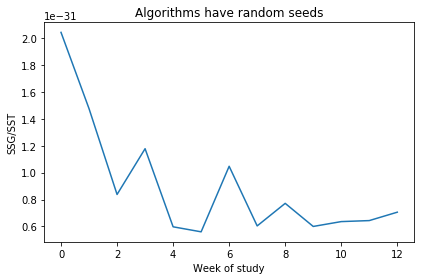

In [34]:
plt.plot(ts2)
plt.ylabel('SSG/SST')
plt.xlabel('Week of study')
plt.title('Algorithms have random seeds')
plt.tight_layout()
plt.savefig('between study variance (SSG) over total measure of variability (SST) algorithm random seeds')


In [26]:
np.diag([4,3,2,1])

array([[4, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 1]])

In [40]:
def get_results_new_save_person(results_path,pop_size,update_time,case,phrase,ophrase):
    
    
    files = os.listdir('{}{}'.format(results_path,case))
    
    steps = []

    #check population and pop_size,update_time
    files = [f for f in files if '.DS' not in f and pop_size in f and phrase in f and ophrase not in f and 'update_days_{}'.format(update_time) in f  and '2015' not in f    ]
    #files = files[:50]
    #print(len(files))
    #print(files)
    seen = 0 
    to_return = {}
    for ff in files:
        sim = int(ff.split('sim_')[1].split('_')[0])
        
        #try:
        with open('{}{}/{}'.format(results_path,case,ff),'rb') as f:
            d = pickle.load(f)
     
            #print(d.keys())
            if len(d)>0:
                to_return[sim]=d['pregret']
    return to_return

In [76]:
t= get_results_new_save_person('../../Downloads/pooling_results_testing/batch/','32',7,'case_one','sanitytwo','?')

In [55]:
t.keys()

dict_keys([11, 7, 34, 8, 45, 25, 0, 16, 33, 19, 42, 22, 24, 44, 9, 35, 6, 10, 23, 18, 43, 32, 17, 1, 20, 40, 31, 2, 14, 27, 39, 47, 28, 36, 13, 48, 5, 15, 3, 30, 41, 21, 4, 12, 49, 29, 37, 46, 26, 38])

In [77]:
to_save = {}
for sim in range(50):
    for person in range(32):
        for time,regret in t[sim][person].items():
            if time not in to_save:
                to_save[time]={}
            if person not in to_save[time]:
                to_save[time][person]={}
            to_save[time][person][sim]=regret

In [78]:
with open('../../Downloads/batch_sanitytwo_regret_check_caseone.pkl','wb') as f:
    pickle.dump(to_save,f) 